In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_excel("C:\\Users\\user\Date_Fruit_Datasets.xlsx")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

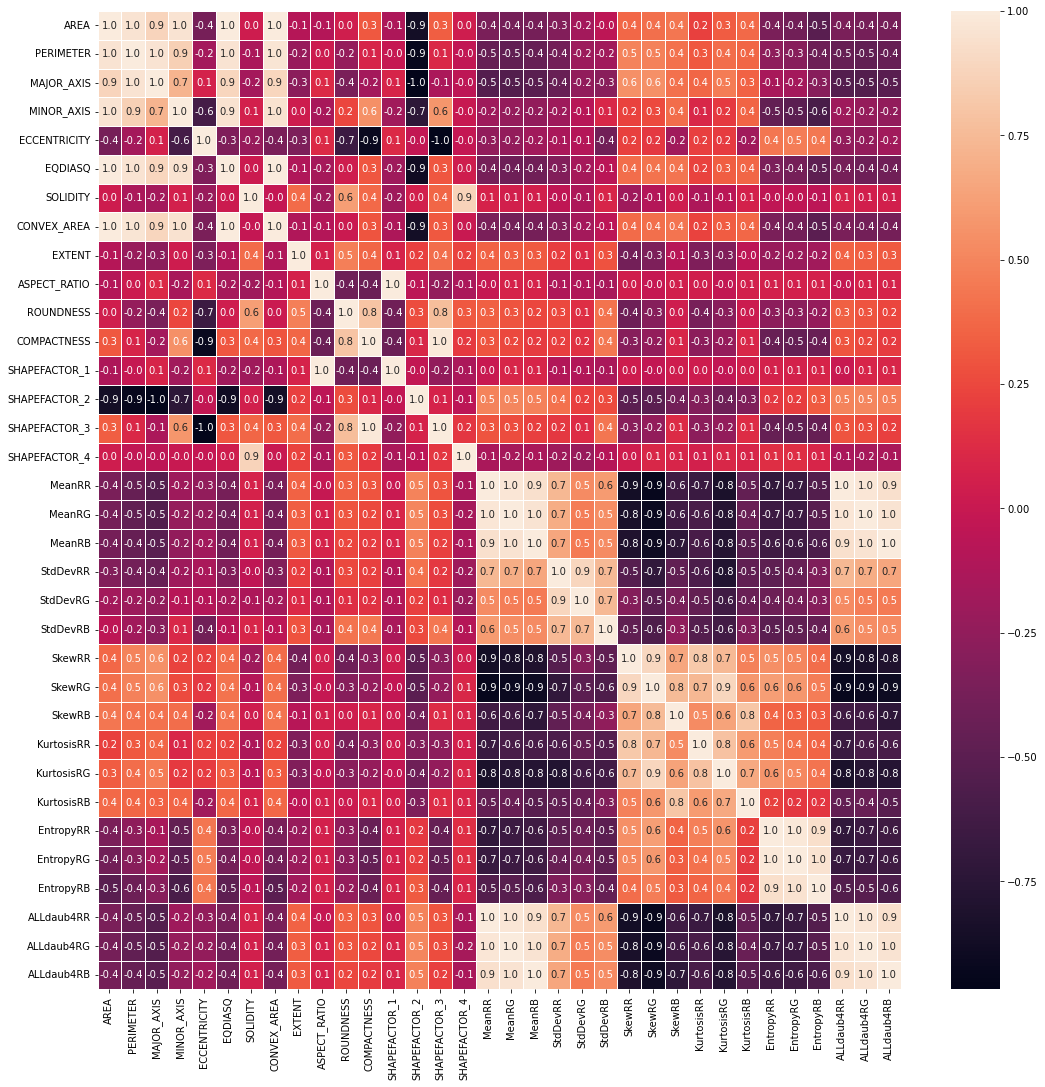

In [5]:
fig,ax = plt.subplots(figsize=(18, 18))
axes = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [6]:
X = df.drop("Class",axis=1)
y = df['Class']
X.shape

(898, 34)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,shuffle=True)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [9]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='auto',max_iter=10000).fit(X_train,y_train)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [10]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        58
      DEGLET       0.00      0.00      0.00        93
       DOKOL       0.67      0.38      0.49       182
       IRAQI       0.50      0.46      0.48        67
      ROTANA       0.35      0.91      0.51       146
      SAFAVI       0.88      0.89      0.88       175
       SOGAY       0.53      0.53      0.53        87

    accuracy                           0.54       808
   macro avg       0.42      0.45      0.41       808
weighted avg       0.50      0.54      0.49       808



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00         7
      DEGLET       0.00      0.00      0.00         5
       DOKOL       0.86      0.55      0.67        22
       IRAQI       0.40      0.80      0.53         5
      ROTANA       0.50      1.00      0.67        20
      SAFAVI       0.96      0.92      0.94        24
       SOGAY       1.00      0.43      0.60         7

    accuracy                           0.68        90
   macro avg       0.53      0.53      0.49        90
weighted avg       0.68      0.68      0.64        90



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

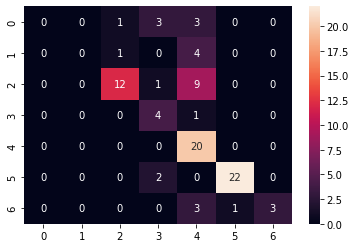

In [11]:
print(classification_report(y_test, logreg.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00         7
      DEGLET       0.30      0.60      0.40         5
       DOKOL       0.82      0.82      0.82        22
       IRAQI       0.40      0.40      0.40         5
      ROTANA       0.86      0.90      0.88        20
      SAFAVI       0.89      1.00      0.94        24
       SOGAY       0.67      0.29      0.40         7

    accuracy                           0.74        90
   macro avg       0.56      0.57      0.55        90
weighted avg       0.72      0.74      0.72        90



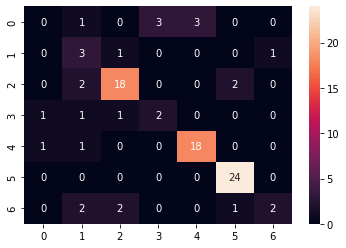

In [12]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(confusion_knn,annot=True)
print(classification_report(y_test,knn.predict(X_test)))

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

       BERHI       1.00      0.71      0.83         7
      DEGLET       0.75      0.60      0.67         5
       DOKOL       0.88      1.00      0.94        22
       IRAQI       0.83      1.00      0.91         5
      ROTANA       0.86      0.95      0.90        20
      SAFAVI       0.96      0.96      0.96        24
       SOGAY       1.00      0.57      0.73         7

    accuracy                           0.90        90
   macro avg       0.90      0.83      0.85        90
weighted avg       0.91      0.90      0.89        90



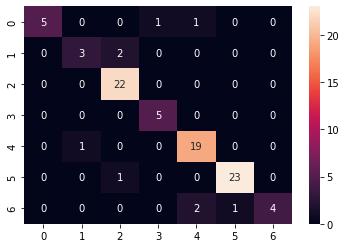

In [13]:
param_grid = {
'n_estimators': [50, 100, 150, 200],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_rcv,annot=True)
print(classification_report(y_test,y_pred_rcv))